In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
dataset= pd.read_csv("Tweets.csv")
dataset

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [3]:
dataset.corr()

<ipython-input-3-c187c74d1e71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
tweet_id,1.000000,0.024840,0.021533,-0.008852
airline_sentiment_confidence,0.024840,1.000000,0.685879,0.012581
negativereason_confidence,0.021533,0.685879,1.000000,0.021574
retweet_count,-0.008852,0.012581,0.021574,1.000000


In [4]:
dataset.shape

(14640, 15)

In [5]:
dataset.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [6]:
air_senti=pd.crosstab(dataset.airline,dataset.airline_sentiment)
air_senti

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


<ipython-input-7-e5b322c3b274>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True)


<AxesSubplot:>

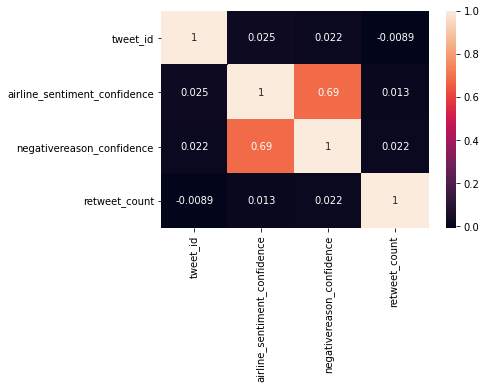

In [7]:
import seaborn as sns
sns.heatmap(dataset.corr(),annot=True)

In [8]:
dataset.isnull().any()

tweet_id                        False
airline_sentiment               False
airline_sentiment_confidence    False
negativereason                   True
negativereason_confidence        True
airline                         False
airline_sentiment_gold           True
name                            False
negativereason_gold              True
retweet_count                   False
text                            False
tweet_coord                      True
tweet_created                   False
tweet_location                   True
user_timezone                    True
dtype: bool

In [9]:
dataset=dataset.drop(columns=['tweet_id','airline_sentiment_gold','negativereason_gold','tweet_coord'],axis=1)

In [10]:
x=dataset.iloc[:,1:].values

In [11]:
x

array([[1.0, nan, nan, ..., '2015-02-24 11:35:52 -0800', nan,
        'Eastern Time (US & Canada)'],
       [0.3486, nan, 0.0, ..., '2015-02-24 11:15:59 -0800', nan,
        'Pacific Time (US & Canada)'],
       [0.6837, nan, nan, ..., '2015-02-24 11:15:48 -0800', 'Lets Play',
        'Central Time (US & Canada)'],
       ...,
       [1.0, nan, nan, ..., '2015-02-22 11:59:15 -0800', 'Nigeria,lagos',
        nan],
       [1.0, 'Customer Service Issue', 0.6659, ...,
        '2015-02-22 11:59:02 -0800', 'New Jersey',
        'Eastern Time (US & Canada)'],
       [0.6771, nan, 0.0, ..., '2015-02-22 11:58:51 -0800', 'dallas, TX',
        nan]], dtype=object)

In [12]:
y=dataset.iloc[:,0].values
y

array(['neutral', 'positive', 'neutral', ..., 'neutral', 'negative',
       'neutral'], dtype=object)

In [13]:
x.shape

(14640, 10)

In [14]:
y.shape

(14640,)

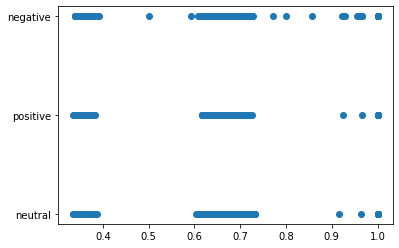

In [15]:
plt.scatter(x[:,0],y)

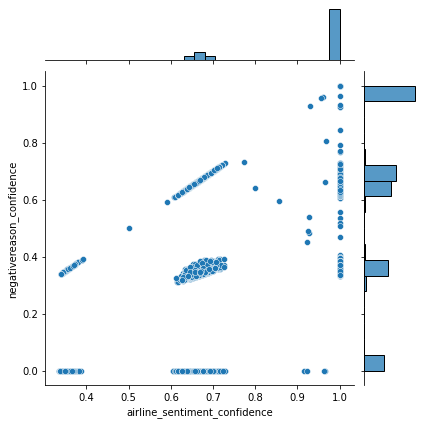

In [16]:
sns.jointplot(x="airline_sentiment_confidence",y="negativereason_confidence",data=dataset);

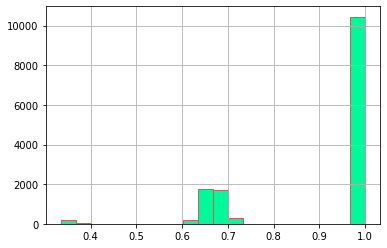

In [17]:
dataset['airline_sentiment_confidence'].hist(bins=20,color='mediumspringgreen',edgecolor='indianred')
plt.show()

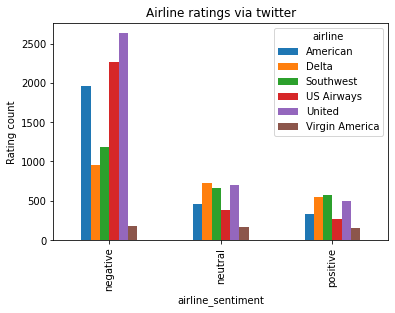

In [18]:
b=dataset.groupby(['airline','airline_sentiment']).count().iloc[:,0].unstack(0).plot(kind='bar',title='Airline ratings via twitter')
b.set_xlabel('airline_sentiment')
b.set_ylabel('Rating count')
plt.show()

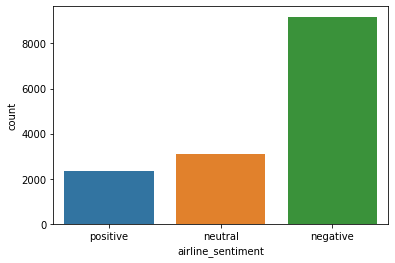

In [19]:
sns.countplot(x='airline_sentiment',data=dataset,order=['positive','neutral','negative'])
plt.show()

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


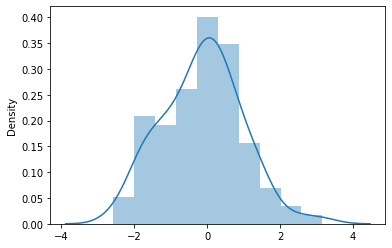

In [20]:
v=np.random.normal(size=100)
sns.distplot(v);

/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


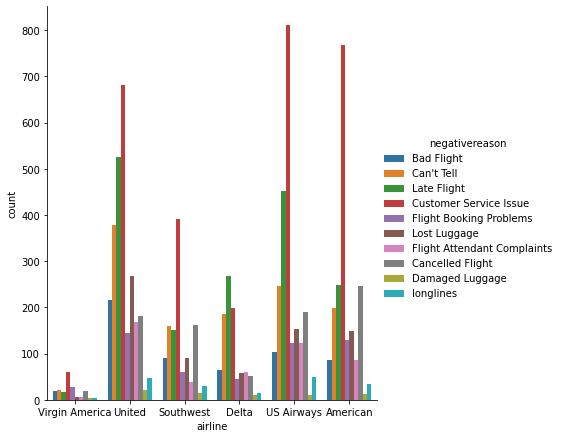

In [21]:
sns.factorplot(x='airline',data=dataset,kind='count',hue='negativereason',size=6,aspect=.9)
plt.show()

In [22]:
mean,cov=[0,1],[(1,.5),(.5,1)]
dataset=np.random.multivariate_normal(mean,cov,200)
df=pd.DataFrame(dataset,columns=["airline_sentiment_confidence","negativereason_confidence"])

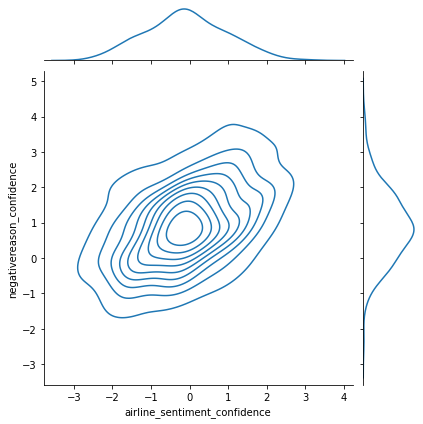

In [23]:
sns.jointplot(x="airline_sentiment_confidence",y="negativereason_confidence",data=df,kind="kde");

In [24]:
import re
import nltk

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saishruthi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [27]:
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for i in r:
        input_txt=re.sub(i,'',input_txt)
    return input_txt

In [28]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
y= lb.fit_transform(y) 

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [30]:
import keras
from keras.models import Sequential 
from keras.layers import Dense

In [31]:
x_train.shape

(11712, 10)

In [32]:
model=Sequential()

In [33]:
model.add(Dense(input_dim=800,activation='sigmoid',units=300))

In [34]:
model.add(Dense(units=100,activation='sigmoid'))

In [35]:
model.add(Dense(units=3,activation='softmax'))

In [36]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [41]:
y_train = np.asarray(y_train).astype(np.float32)

In [39]:
model.fit(x_train,y_train,epochs=70,batch_size=10)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [40]:
y_pred=model.predict(x_test)
y_pred

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [ ]:
y_read=(y_pred>0.5)
y_pred

In [ ]:
y_test

In [ ]:
score=model.evaluate(x_test,y_test)

print("Test Score:", score[0])
print("Test accuracy:",score[1])

In [42]:
v=model.predict(cv.transform(["Customer Service Issue"]))
v

NameError: name 'cv' is not defined

In [ ]:
r=model.predict(cv.transform(["bad flight"]))
r

In [ ]:
model.save("airline_predictions.h5")

In [ ]:
def tweet_to_words(raw_tweet):
    letter_only=re.sub("[^a-za-Z]"," ",raw_tweet)
    words=letters_onlt.lower().split()
    stops=set(stopwords.words("english"))
    meaningful_words=[w for w in words if not w in stops]
    return( " ".join(meaningful_words))

In [ ]:
def clean_tweet_length(raw_tweet):
    letter_only=re.sub("[^a-za-Z]"," ",raw_tweet)
    words=letters_onlt.lower().split()
    stops=set(stopwords.words("english"))
    meaningful_words=[w for w in words if not w in stops]
    return(len(meaningful_words))

In [ ]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
import os

In [ ]:
def tweet_to_words(raw_tweet):
    letter_only=re.sub("[^a-za-Z]"," ",raw_tweet)
    words=letters_onlt.lower().split()
    stops=set(stopwords.words("english"))
    meaningful_words=[w for w in words if not w in stops]
    return( " ".join(meaningful_words))

In [ ]:
def clean_tweet_length(raw_tweet):
    letter_only=re.sub("[^a-za-Z]"," ",raw_tweet)
    words=letters_onlt.lower().split()
    stops=set(stopwords.words("english"))
    meaningful_words=[w for w in words if not w in stops]
    return(len(meaningful_words))

In [ ]:
dataset['sentiment']=dataset['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)
dataset.sentiment.head()

In [ ]:
dataset['clean_tweet']=dataset['text'].apply(lambda x: tweet_to_words(x))
dataset['Tweet_length']=dataset['text'].apply(lambda x: clean_tweet_length(x))
train,test= train_test_split(dataset,test_size=0.2,random_state=42)

In [ ]:
train_clean_tweet=[]
for tweets in train['clean_tweet']:
    train_clean_tweet.append(tweets)
test_clean_tweet=[]
for tweets in test['clean_tweet']:
    test_clean_tweet.append(tweets)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v= CountVectorizer(analyzer="word")
train_features=v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisiontreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [ ]:
Classifiers= [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200)
    KNeighborsClassifier(3),
    SVC(Kernel="rbf",C=0.025,probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB()]


In [ ]:
dense_features=train_features.toarray()
desne_test=test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit=classifier.fit(train_features,train['sentiment'])
        pred=fit.predict(test_features)
    except Exception:
        fit=classifier.fit(dense_features,train['sentiment'])
        pred=fit.predict(dense_test)
    accuracy=accuracy_score(pred,test['sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.name__)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))

In [ ]:
Index=[1,2,3,4,5,6,7]
plt.bar(Index,Accuracy)
plt.xticks(Index,Model,rotation=45)
plt.ylable('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')